In [1]:
import math
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 300

In [2]:
def getPsi(U, r, theta, R=40):
    return U*(r-(R**2/r))*math.sin(theta)

In [3]:
def getPsiCylinder(U, x, y, a=40):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore") # ignore zero division error
        return U*np.sqrt(np.power(x, 2)+np.power(y, 2))*(1-(a**2/(np.power(x, 2) + np.power(y, 2))))*np.sin(np.arctan2(y, x))

In [4]:
a = 40 #m
d = 80 # m

In [5]:
def plotContour(X, Y, Z, numContours):
    fig, ax = plt.subplots()
    ct = plt.contour(X, Y, Z, numContours, cmap="plasma")
    fig.colorbar(ct)
    plt.title("Contour plot of streamlines around a bridge pier \nunder uniform flow conditions", pad=20)
    plt.show()

In [6]:
def cartesian_to_polar(x, y, rounding=False):
    r = math.sqrt(x**2 + y**2)
    theta = math.nan
    if x != 0:
        theta = math.atan2(y, x)
    elif x == 0:
        theta = math.pi/2
    elif x == 0 and y < 0:
        theta = -math.pi/2
    if rounding and theta != math.nan:
        theta = round(theta, 2)
    return r, theta

In [7]:
def main(a, u, step, numCountours=100, showGraphs=True):
    x = np.arange(-100, 101, step)
    y = np.arange(-100, 101, step)
    X, Y = np.meshgrid(x, y)
    maskedZ = (np.sqrt(np.power(X, 2)+np.power(Y, 2)) >= a) * 1 
    Z = getPsiCylinder(u, X, Y)
    Z = np.nan_to_num(Z)
    gradX, gradY = np.gradient(Z)
    gradX *= maskedZ
    gradY *= maskedZ
    magZ = np.sqrt(np.power(gradX, 2) + np.power(gradY, 2))
    coordX, coordY = np.where(magZ == np.nanmax(magZ))
    if showGraphs:
        plotContour(X, Y, Z, numCountours)
        plotContour(X, Y, (Z*maskedZ), numCountours)
    for index, coords in enumerate(zip(coordX, coordY)):
        xcoord = X[coords[0], coords[1]]
        ycoord = Y[coords[0], coords[1]]
        print(f"Maximum absolute velocity {index+1} is located at: a) Cartesian: {(xcoord, ycoord)} b) Polar: {cartesian_to_polar(xcoord, ycoord, rounding=True)} with magnitude: {round(magZ[coords[0]][coords[1]], 4)} m/s")

## a) & 1/2c) Location and value of the absolute maximum velocity of flow field when incident current speed is 1 m/s

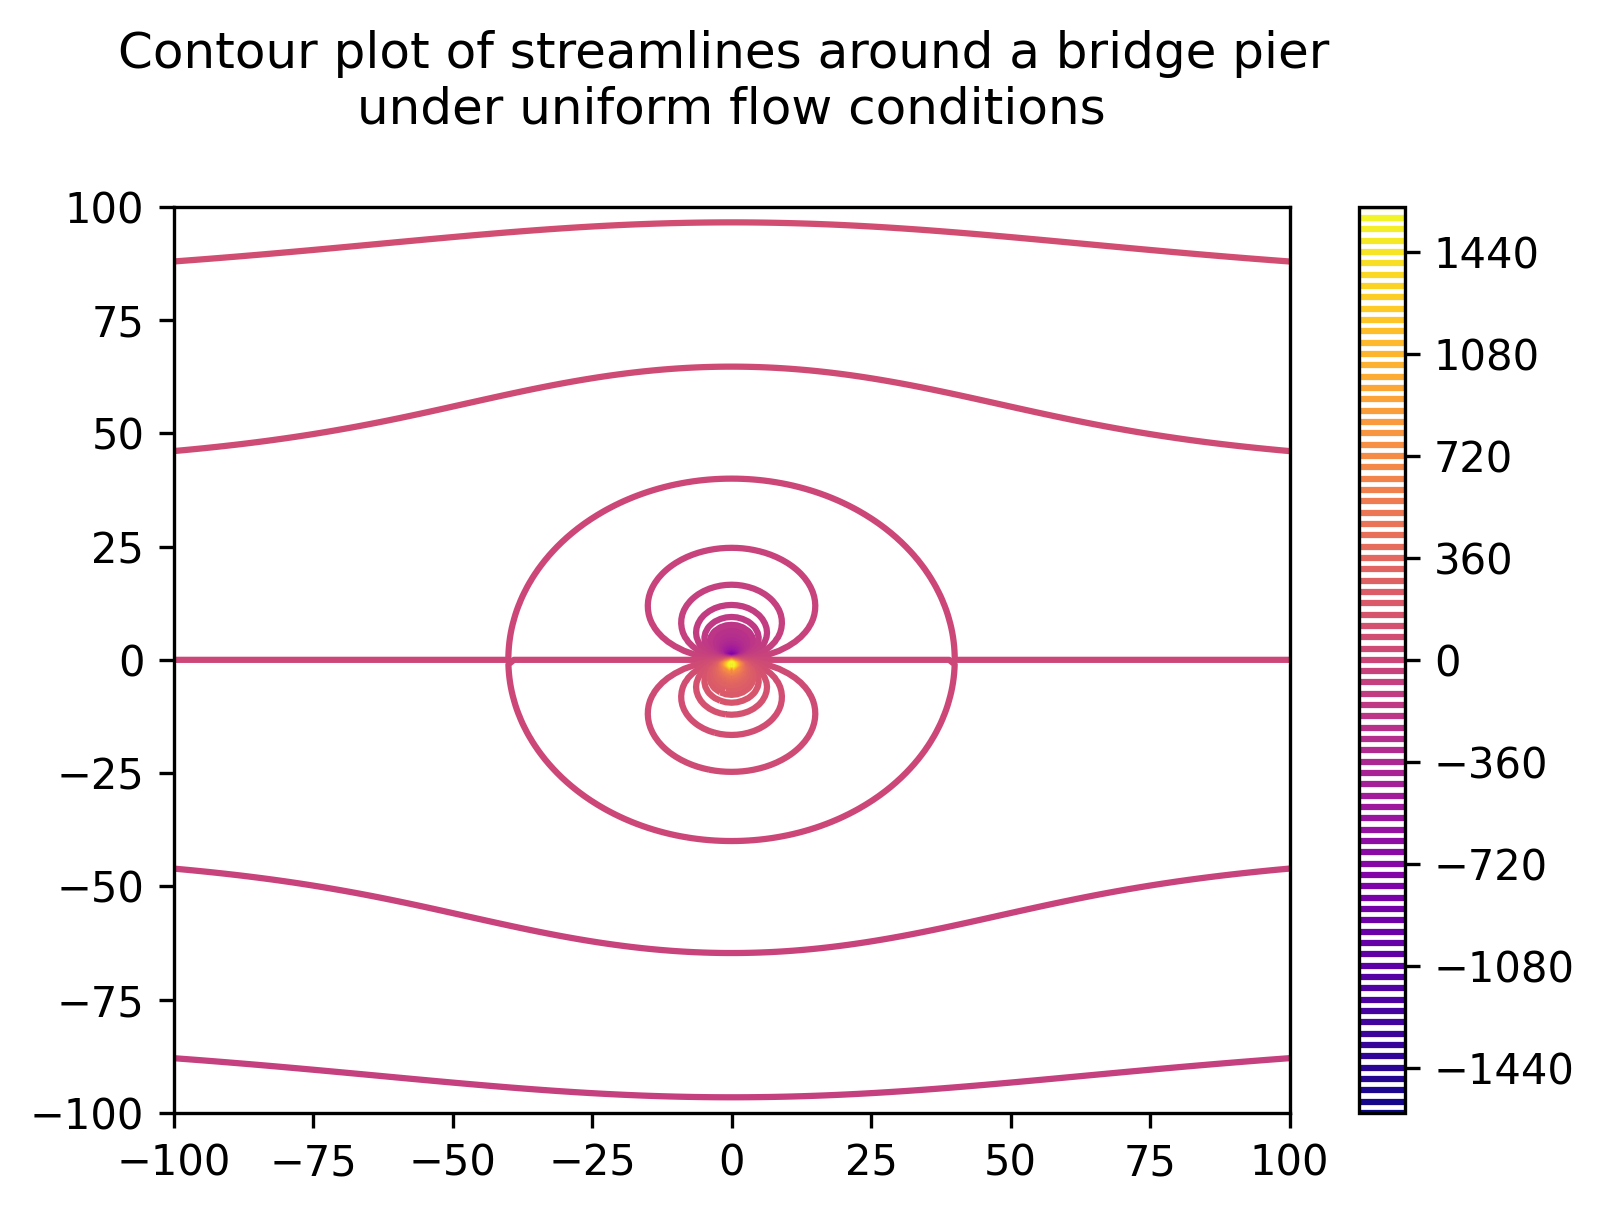

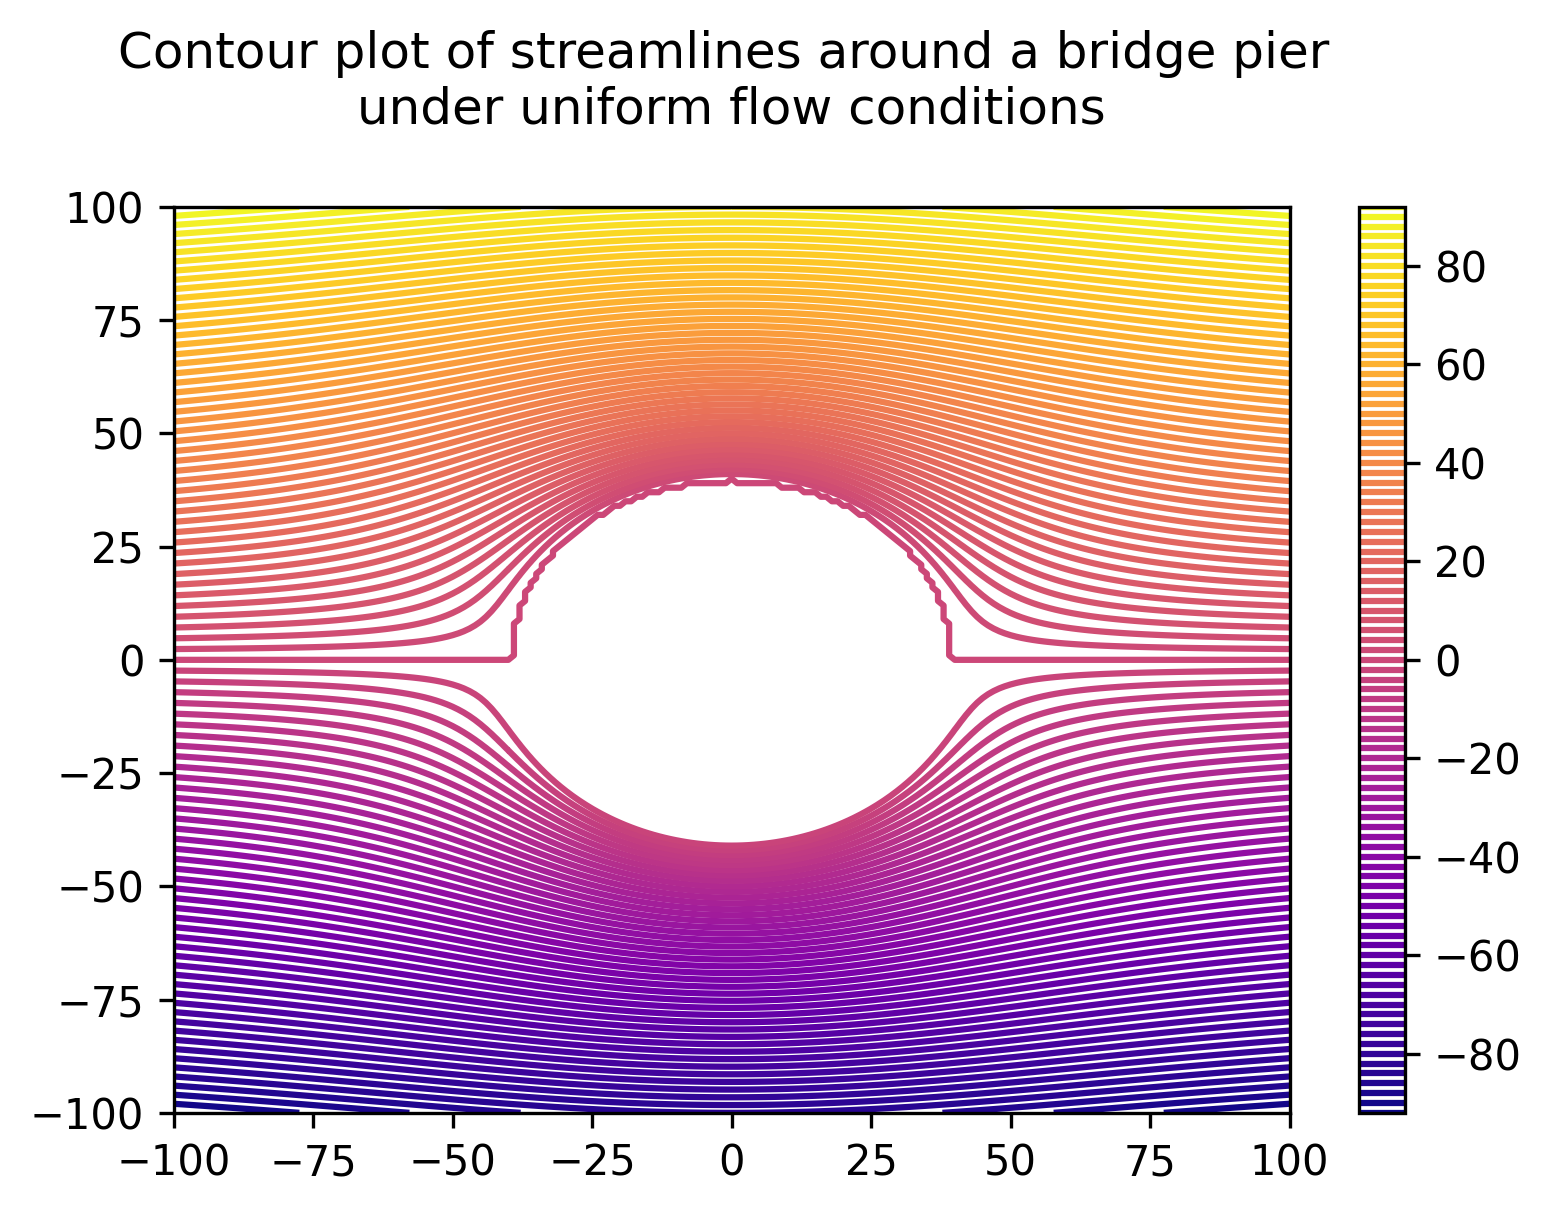

Maximum absolute velocity 1 is located at: a) Cartesian: (0, -40) b) Polar: (40.0, 1.57) with magnitude: 2.0006 m/s
Maximum absolute velocity 2 is located at: a) Cartesian: (0, 40) b) Polar: (40.0, 1.57) with magnitude: 2.0006 m/s


In [8]:
main(a, 1, 1)

## b) & 1/2c) Location and value of the absolute maximum velocity of flow field when incident current speed is 0.5 m/s

In [9]:
main(a, 0.5, 1, showGraphs=False)

Maximum absolute velocity 1 is located at: a) Cartesian: (0, -40) b) Polar: (40.0, 1.57) with magnitude: 1.0003 m/s
Maximum absolute velocity 2 is located at: a) Cartesian: (0, 40) b) Polar: (40.0, 1.57) with magnitude: 1.0003 m/s


## d) Visual change in contour plot due to a change of step size from 1 to 50

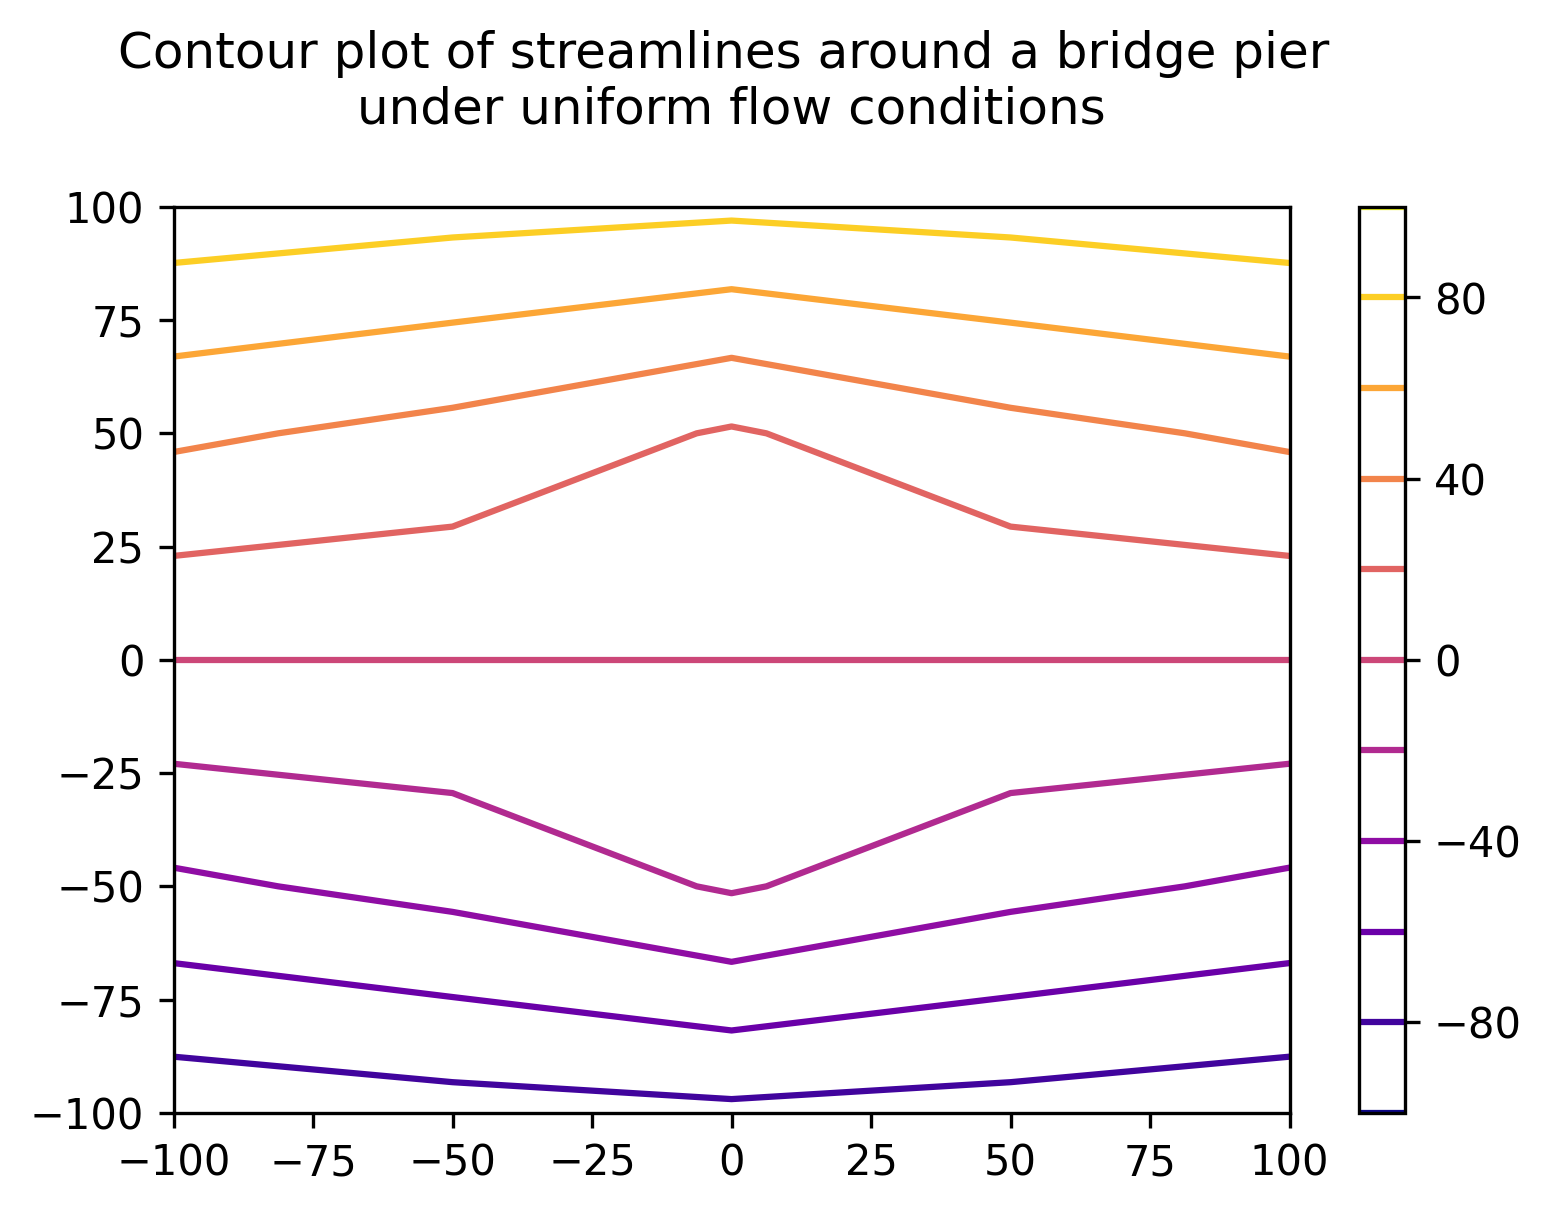

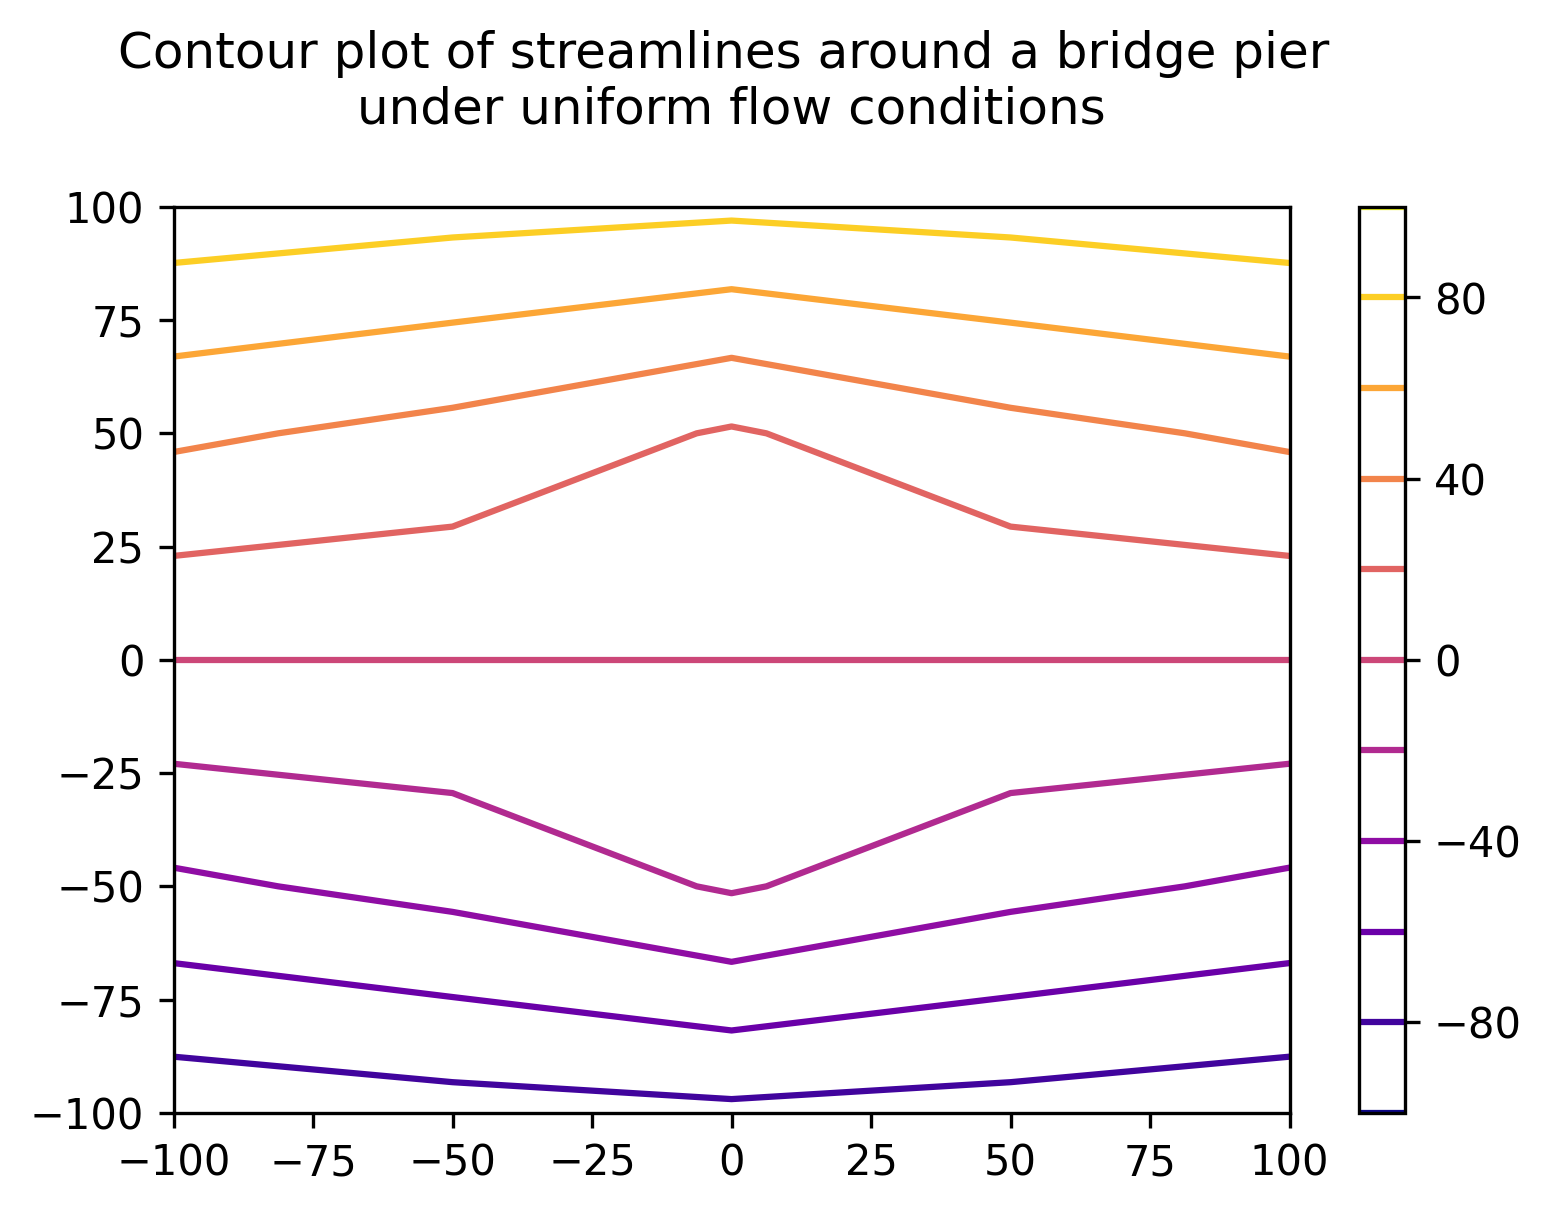

Maximum absolute velocity 1 is located at: a) Cartesian: (0, -100) b) Polar: (100.0, 1.57) with magnitude: 66.0 m/s
Maximum absolute velocity 2 is located at: a) Cartesian: (0, 100) b) Polar: (100.0, 1.57) with magnitude: 66.0 m/s


In [10]:
main(a, 1, 50, 10, True)

e)

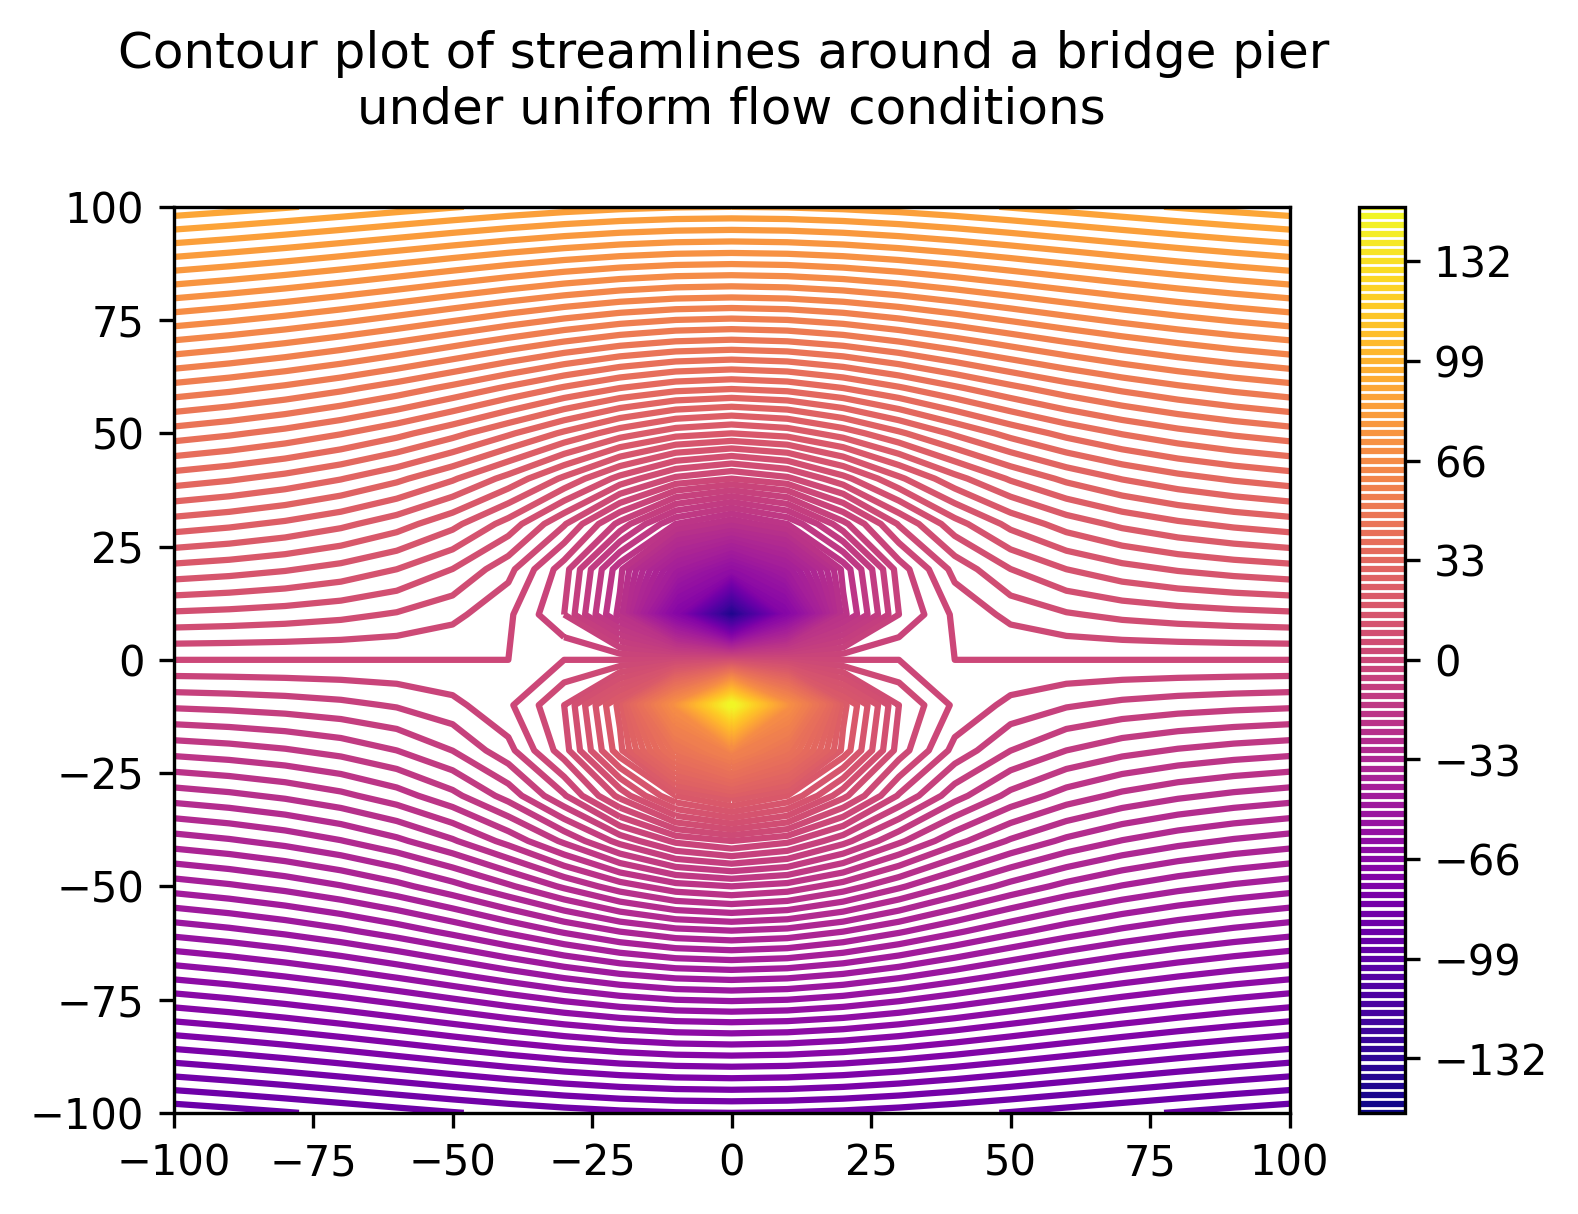

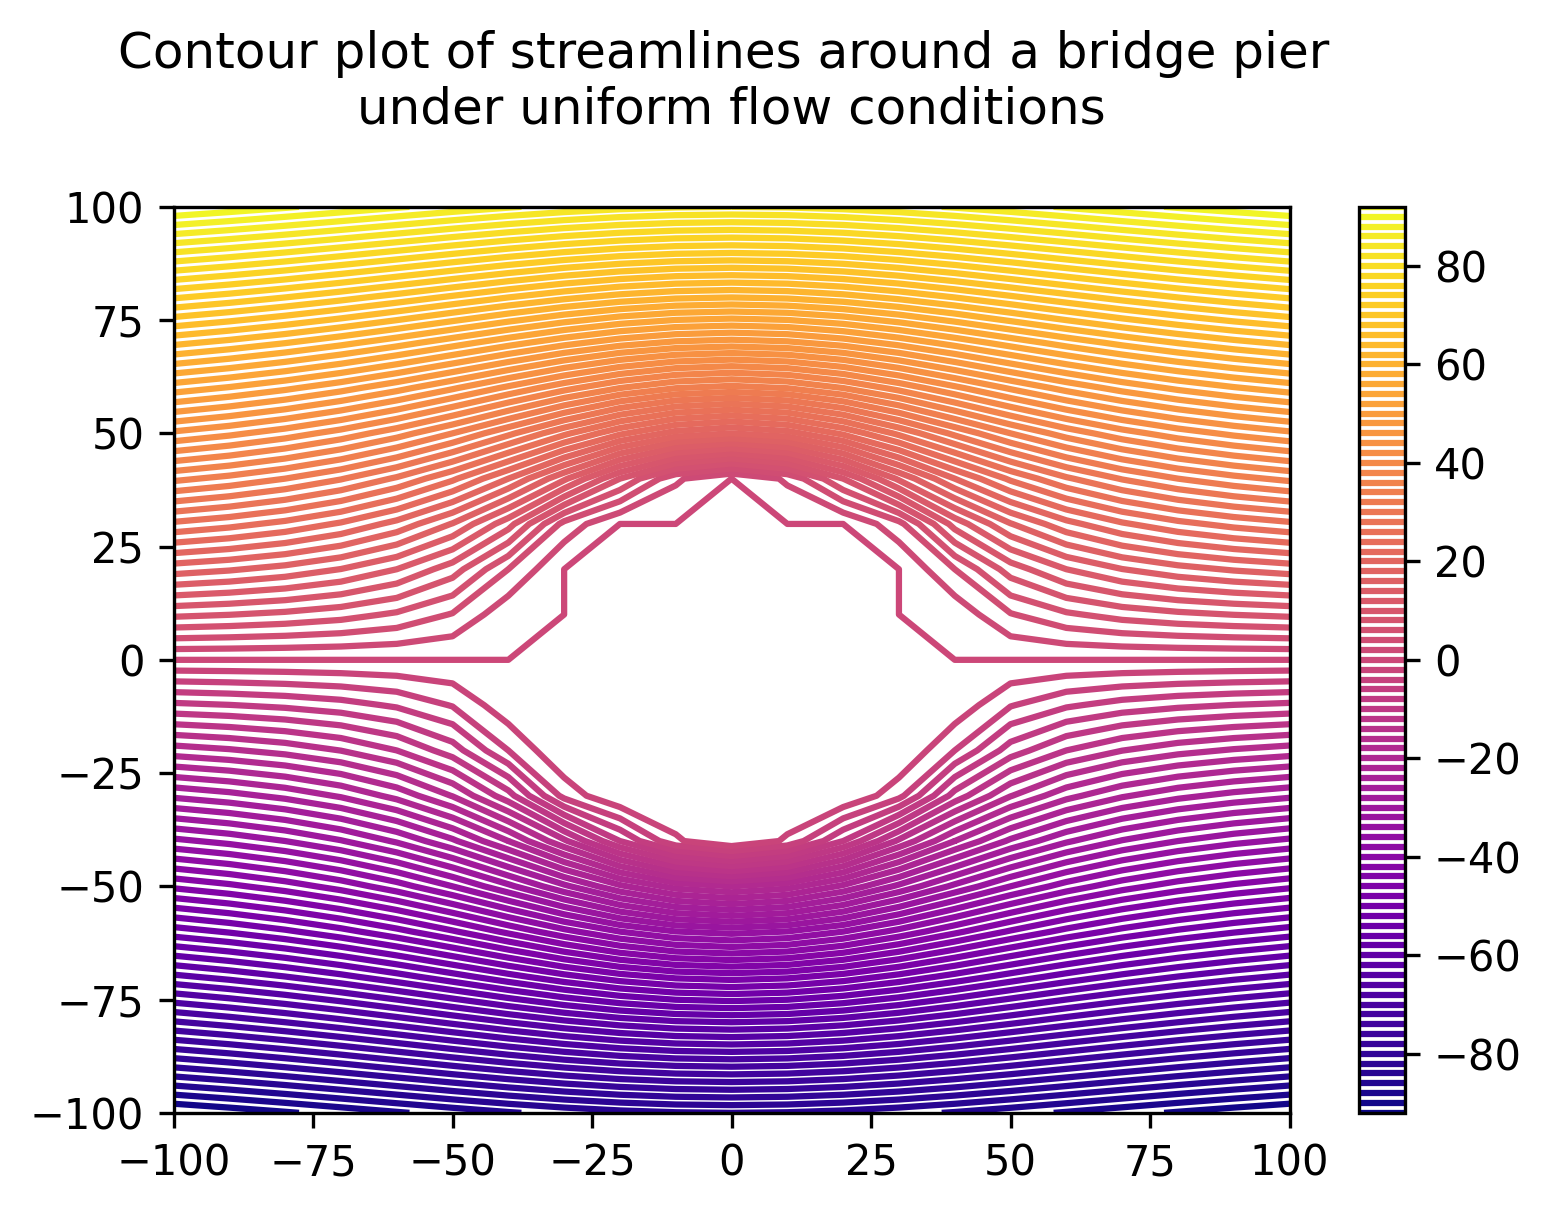

Maximum absolute velocity 1 is located at: a) Cartesian: (0, -40) b) Polar: (40.0, 1.57) with magnitude: 20.6667 m/s
Maximum absolute velocity 2 is located at: a) Cartesian: (0, 40) b) Polar: (40.0, 1.57) with magnitude: 20.6667 m/s


In [12]:
main(a, 1, 10, 100, True)